In [ ]:
# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import csv
import datetime

# Import API key
from api_keys import weather_api_key

In [ ]:
#pip install citipy


In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
ID=[]
Country=[]
MaxTemp=[]
Humidity=[]
lat=[]
lng=[]
Cloudiness=[]
Wind_Speed=[]
CityName=[]
Date=[]

units="Imperial"

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
# # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
     
    weather_response = requests.get(query_url)
    weather_data = weather_response.json()
    weather_json=json.dumps(weather_data,indent=4,sort_keys=True)
    
    
    
    try:
        
        ID.append(weather_data["id"])
        CityName.append(weather_data["name"])
        Country.append(weather_data["sys"]["country"])
        Date.append(weather_data["dt"])
        MaxTemp.append(weather_data["main"]["temp_max"])
        Humidity.append(weather_data["main"]["humidity"])
        Cloudiness.append(weather_data["clouds"]["all"])
        lat.append(weather_data["coord"]["lat"])
        lng.append(weather_data["coord"]["lon"])
        Wind_Speed.append(weather_data["wind"]["speed"])
        
        print("City Number:{},City Name:{} ".format(weather_data["id"],city))
              
    except (KeyError,IndexError):
       print("Info Not available...skipping")

    
    

City Number:5924351,City Name:clyde river 
City Number:1649150,City Name:bengkulu 
City Number:2620871,City Name:hals 
City Number:470905,City Name:vuktyl 
City Number:3873145,City Name:rio bueno 
City Number:2120591,City Name:tilichiki 
City Number:5106841,City Name:albany 
City Number:2017155,City Name:saskylakh 
City Number:2110227,City Name:butaritari 
Info Not available...skipping
City Number:3361934,City Name:saldanha 
City Number:3466704,City Name:castro 
City Number:4030556,City Name:rikitea 
City Number:2276492,City Name:harper 
City Number:2015306,City Name:tiksi 
City Number:3374210,City Name:sao filipe 
City Number:3897334,City Name:calbuco 
City Number:3394023,City Name:natal 
City Number:1267635,City Name:karwar 
City Number:1267390,City Name:kavaratti 
City Number:6201424,City Name:mataura 
City Number:4034551,City Name:faanui 
City Number:3652764,City Name:puerto ayora 
Info Not available...skipping
City Number:653272,City Name:kemijarvi 
City Number:1106677,City Name:b

City Number:2421273,City Name:faranah 
City Number:6316343,City Name:alta floresta 
City Number:2173911,City Name:broken hill 
City Number:2236967,City Name:soyo 
City Number:1687894,City Name:santa rosa 
City Number:933995,City Name:souillac 
City Number:1529376,City Name:korla 
City Number:2175403,City Name:blackwater 
City Number:6089245,City Name:norman wells 
Info Not available...skipping
City Number:2240449,City Name:luanda 
City Number:2126682,City Name:bilibino 
Info Not available...skipping
City Number:2126785,City Name:belaya gora 
Info Not available...skipping
City Number:1855342,City Name:nishihara 
Info Not available...skipping
City Number:1244926,City Name:hambantota 
City Number:1855540,City Name:naze 
City Number:336454,City Name:ginir 
City Number:3430863,City Name:mar del plata 
City Number:4031742,City Name:egvekinot 
City Number:3388847,City Name:sao felix do xingu 
Info Not available...skipping
City Number:2132606,City Name:samarai 
City Number:1786640,City Name:yi

City Number:714504,City Name:turkeve 
City Number:2142316,City Name:yeppoon 
City Number:2138555,City Name:poum 
City Number:4898433,City Name:kewanee 
City Number:3987309,City Name:san diego de la union 
City Number:5720495,City Name:coos bay 
City Number:3833859,City Name:tres arroyos 
City Number:3939761,City Name:hualmay 
City Number:2191562,City Name:dunedin 
City Number:2447513,City Name:arlit 
City Number:4414200,City Name:west plains 
City Number:2656847,City Name:atherton 
City Number:3416888,City Name:grindavik 
City Number:3671387,City Name:puerto narino 
City Number:5392171,City Name:san jose 
City Number:3664301,City Name:envira 
City Number:3932145,City Name:pisco 
City Number:4231997,City Name:avera 
City Number:2513703,City Name:moncada 
City Number:7671223,City Name:kloulklubed 
City Number:609924,City Name:emba 
City Number:1810637,City Name:ganzhou 
City Number:110690,City Name:faya 
City Number:5919850,City Name:chapais 
Info Not available...skipping
City Number:334

City Number:1142226,City Name:dawlatabad 
City Number:1791121,City Name:changde 
City Number:1502862,City Name:kolpashevo 
City Number:3919998,City Name:cobija 
City Number:1005781,City Name:elliot 
City Number:2958975,City Name:aichach 
City Number:3356213,City Name:khorixas 
City Number:3892454,City Name:diego de almagro 
City Number:733722,City Name:ahtopol 
City Number:1525376,City Name:bestobe 
City Number:209598,City Name:manono 


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
output_file="city_data.csv"

FormattedDate=[]
fields=["ID","City Name","Country","Date","MaxTemp","Humidity","lat","lng","Cloudiness","Wind_Speed","Formatted Date"]
for item in Date:
    FormattedDate.append(datetime.date.fromtimestamp(item))
   # City_data_df["Formatted Date"]=Date[item]
#City_data_df.head()

#change the list of column items  to rows to write to csv
rows=zip(ID,CityName,Country,Date,MaxTemp,Humidity,lat,lng,Cloudiness,Wind_Speed,FormattedDate,)
with open(output_file,'w',encoding='UTF-8') as csvfile:
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
    csvwriter.writerow(fields)  
        
    # writing the data rows  
    for row in rows:
        csvwriter.writerow(row) 

    

In [7]:
City_data_df=pd.read_csv('city_data.csv', sep = ',')
City_data_df.head()

,ID,City Name,Country,Date,MaxTemp,Humidity,lat,lng,Cloudiness,Wind_Speed,Formatted Date
0,5924351,Clyde River,CA,1595731143,39.20,93,70.47,-68.59,75,6.93,2020-07-25
1,1649150,Bengkulu,ID,1595731146,82.74,70,-3.80,102.27,4,7.76,2020-07-25
2,2620871,Hals,DK,1595731146,61.00,94,57.00,10.31,100,3.00,2020-07-25
3,470905,Vuktyl,RU,1595731146,65.10,61,63.86,57.31,57,1.81,2020-07-25
4,3873145,Río Bueno,CL,1595731146,46.40,100,-40.32,-72.97,100,5.82,2020-07-25


In [8]:
City_data_df.info()
#To check if there are duplicates for the cities.
a=City_data_df["City Name"].unique()
len(a)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              594 non-null    int64  
 1   City Name       594 non-null    object 
 2   Country         590 non-null    object 
 3   Date            594 non-null    int64  
 4   MaxTemp         594 non-null    float64
 5   Humidity        594 non-null    int64  
 6   lat             594 non-null    float64
 7   lng             594 non-null    float64
 8   Cloudiness      594 non-null    int64  
 9   Wind_Speed      594 non-null    float64
 10  Formatted Date  594 non-null    object 
dtypes: float64(4), int64(4), object(3)
memory usage: 51.2+ KB


594

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#locate all rows with humidy>0
new_df=City_data_df.loc[City_data_df["Humidity"]> 100]
new_df
#No Cities with humidty >100
#drop rows wherein any of the column values are empty
clean_city_data_df=City_data_df.dropna(axis=0,how='any',inplace=False)
clean_city_data_df



,ID,City Name,Country,Date,MaxTemp,Humidity,lat,lng,Cloudiness,Wind_Speed,Formatted Date
0,5924351,Clyde River,CA,1595731143,39.20,93,70.47,-68.59,75,6.93,2020-07-25
1,1649150,Bengkulu,ID,1595731146,82.74,70,-3.80,102.27,4,7.76,2020-07-25
2,2620871,Hals,DK,1595731146,61.00,94,57.00,10.31,100,3.00,2020-07-25
3,470905,Vuktyl,RU,1595731146,65.10,61,63.86,57.31,57,1.81,2020-07-25
4,3873145,Río Bueno,CL,1595731146,46.40,100,-40.32,-72.97,100,5.82,2020-07-25
...,...,...,...,...,...,...,...,...,...,...,...
588,2958975,Aichach,DE,1595731215,64.00,82,48.46,11.13,82,4.70,2020-07-25
590,3892454,Diego de Almagro,CL,1595731215,48.49,51,-26.37,-70.05,0,1.57,2020-07-25
591,733722,Ahtopol,BG,1595731215,68.00,88,42.10,27.95,0,5.82,2020-07-25
592,1525376,Bestöbe,KZ,1595731216,66.97,56,52.50,73.10,83,10.11,2020-07-25


In [ ]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Analysing the relationship between Temperature and Latitude
As you move towards the equator, the average temperature tends to rise


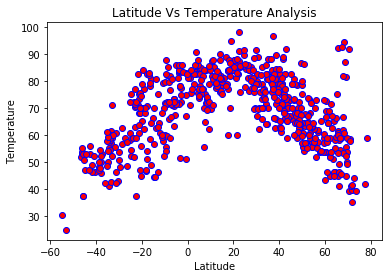

In [11]:
plt.scatter(x=City_data_df["lat"],y=City_data_df["MaxTemp"],edgecolors="b",facecolor="r")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude Vs Temperature Analysis")
plt.savefig("Output_plots/LatvsTemp.png")
print("Analysing the relationship between Temperature and Latitude")
print("As you move towards the equator, the average temperature tends to rise")

## Latitude vs. Humidity Plot

Analysing the relationship between Latitude and Humidity:
The scatterplot shows even spread of Humidity across different lattitudes


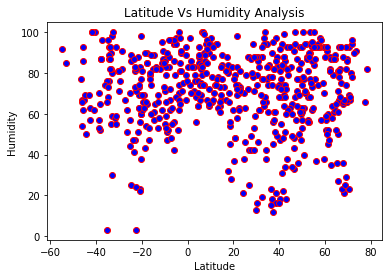

In [12]:
plt.scatter(x=City_data_df["lat"],y=City_data_df["Humidity"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude Vs Humidity Analysis")
plt.savefig("Output_plots/LatvsHum.png")
print("Analysing the relationship between Latitude and Humidity:")
print("The scatterplot shows even spread of Humidity across different lattitudes")

## Latitude vs. Cloudiness Plot

Analysing the relationship between Latitude and Cloudiness

Even distribution of Cloudiness across different latitudes


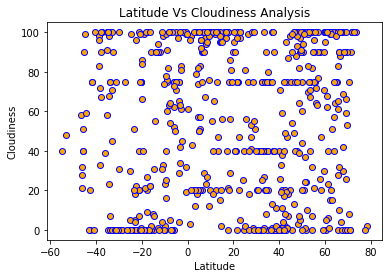

In [13]:
plt.scatter(x=City_data_df["lat"],y=City_data_df["Cloudiness"],edgecolors="b",facecolor="orange")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude Vs Cloudiness Analysis")
plt.savefig("Output_plots/LatvsCloud.png")
print("Analysing the relationship between Latitude and Cloudiness\n")
print("Even distribution of Cloudiness across different latitudes")

## Latitude vs. Wind Speed Plot

Analysing the relationship between Latitude and Wind Speed

Even distribution of Wind Speed across different latitudes but mostly the windspeed is below 10


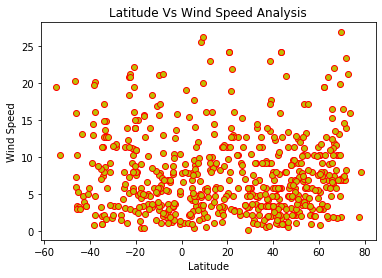

In [14]:
plt.scatter(x=City_data_df["lat"],y=City_data_df["Wind_Speed"],edgecolors="r",facecolor="y")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude Vs Wind Speed Analysis")
plt.savefig("Output_plots/LatvsWS.png")
print("Analysing the relationship between Latitude and Wind Speed\n")
print("Even distribution of Wind Speed across different latitudes but mostly the windspeed is below 10")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots



In [15]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df=City_data_df.loc[City_data_df["lat"]>=0]
Southern_df=City_data_df.loc[City_data_df["lat"]<0]
Northern_df.head()


,ID,City Name,Country,Date,MaxTemp,Humidity,lat,lng,Cloudiness,Wind_Speed,Formatted Date
0,5924351,Clyde River,CA,1595731143,39.20,93,70.47,-68.59,75,6.93,2020-07-25
2,2620871,Hals,DK,1595731146,61.00,94,57.00,10.31,100,3.00,2020-07-25
3,470905,Vuktyl,RU,1595731146,65.10,61,63.86,57.31,57,1.81,2020-07-25
5,2120591,Tilichiki,RU,1595731146,72.66,52,60.47,166.10,0,5.35,2020-07-25
6,5106841,Albany,US,1595731112,77.00,86,42.60,-73.97,2,4.38,2020-07-25


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Northern Hemisphere:Regression between Latitude and Temperature

As you go away from the equatortowards the North Pole the temperature is going down


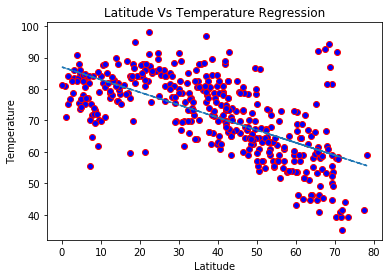

In [16]:
(slope,intercept,_,_,_)=linregress(x=Northern_df["lat"],y=Northern_df["MaxTemp"])
latitude =Northern_df .iloc[:,6]
Temperature=Northern_df.iloc[:,4]
fit=slope * latitude +intercept
plt.scatter(x=Northern_df["lat"],y=Northern_df["MaxTemp"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude Vs Temperature Regression")
plt.plot(latitude,fit,"--")
print("Northern Hemisphere:Regression between Latitude and Temperature\n")
print("As you go away from the equatortowards the North Pole the temperature is going down")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Southern Hemisphere:Regression between Latitude and Temp
 
As you go away from the equatortowards the South Pole the temperature is going down


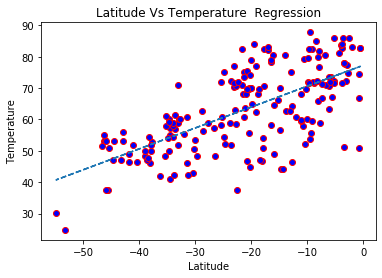

In [17]:
(slope,intercept,_,_,_)=linregress(x=Southern_df["lat"],y=Southern_df["MaxTemp"])
latitude =Southern_df .iloc[:,6]
Temperature=Southern_df.iloc[:,4]
fit=slope * latitude +intercept
plt.scatter(x=Southern_df["lat"],y=Southern_df["MaxTemp"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude Vs Temperature  Regression")
plt.plot(latitude,fit,"--")
print("Southern Hemisphere:Regression between Latitude and Temp\n ")
print("As you go away from the equatortowards the South Pole the temperature is going down")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Northern Hemispher:Regression between Latitude and Humidity
 
Minimal relationship between Latitude and Humidity


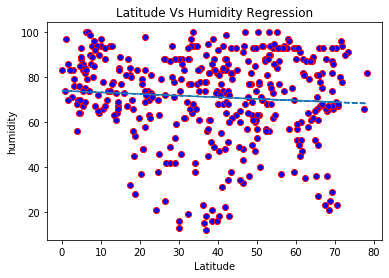

In [18]:
(slope,intercept,_,_,_)=linregress(x=Northern_df["lat"],y=Northern_df["Humidity"])
latitude =Northern_df .iloc[:,6]
Humidity=Northern_df.iloc[:,5]
fit=slope * latitude +intercept
plt.scatter(x=Northern_df["lat"],y=Northern_df["Humidity"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.title("Latitude Vs Humidity Regression")
plt.plot(latitude,fit,"--")
print("Northern Hemispher:Regression between Latitude and Humidity\n ")
print("Minimal relationship between Latitude and Humidity")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Southern Hemispher:Regression between Latitude and Humidity
 
Minimal relationship between Latitude and Humidity


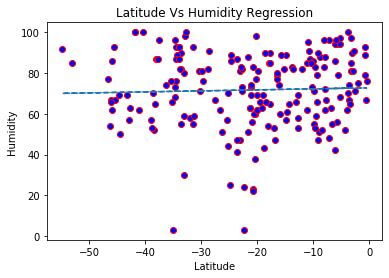

In [19]:
(slope,intercept,_,_,_)=linregress(x=Southern_df["lat"],y=Southern_df["Humidity"])
latitude =Southern_df .iloc[:,6]
Humidity=Southern_df.iloc[:,5]
fit=slope * latitude +intercept
plt.scatter(x=Southern_df["lat"],y=Southern_df["Humidity"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude Vs Humidity Regression")
plt.plot(latitude,fit,"--")
print("Southern Hemispher:Regression between Latitude and Humidity\n ")
print("Minimal relationship between Latitude and Humidity")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression between Latitude and Cloudiness
 
Minimal relationship between Latitude and Cloudiness



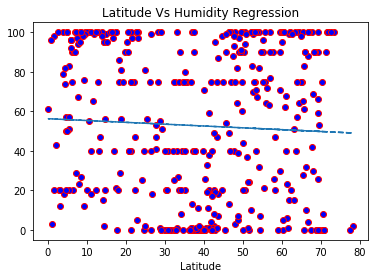

In [20]:
(slope,intercept,_,_,_)=linregress(x=Northern_df["lat"],y=Northern_df["Cloudiness"])
latitude =Northern_df .iloc[:,6]
Temperature=Northern_df.iloc[:,8]
fit=slope * latitude +intercept
plt.scatter(x=Northern_df["lat"],y=Northern_df["Cloudiness"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("")
plt.title("Latitude Vs Humidity Regression")
plt.plot(latitude,fit,"--")
print("Regression between Latitude and Cloudiness\n ")
print("Minimal relationship between Latitude and Cloudiness\n")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Southern Hemispher :Regression between Latitude and Cloudiness
 
Minimal relationship between Latitude and Cloudiness


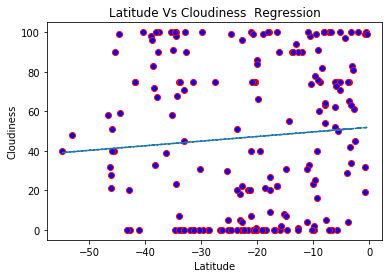

In [21]:
(slope,intercept,_,_,_)=linregress(x=Southern_df["lat"],y=Southern_df["Cloudiness"])
latitude =Southern_df .iloc[:,6]
Clousiness=Southern_df.iloc[:,8]
fit=slope * latitude +intercept
plt.scatter(x=Southern_df["lat"],y=Southern_df["Cloudiness"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude Vs Cloudiness  Regression")
plt.plot(latitude,fit,"--")
print("Southern Hemispher :Regression between Latitude and Cloudiness\n ")
print("Minimal relationship between Latitude and Cloudiness")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Northern Hemisphere:Regression between Latitude and Wind Speed

Minimal relationship between Latitude and Wind Speed 


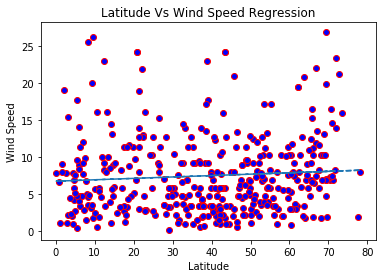

In [22]:
####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(slope,intercept,_,_,_)=linregress(x=Northern_df["lat"],y=Northern_df["Wind_Speed"])
latitude =Northern_df .iloc[:,6]
WindSpeed=Northern_df.iloc[:,9]
fit=slope * latitude +intercept
plt.scatter(x=Northern_df["lat"],y=Northern_df["Wind_Speed"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude Vs Wind Speed Regression")
plt.plot(latitude,fit,"--")
print("Northern Hemisphere:Regression between Latitude and Wind Speed\n")
print("Minimal relationship between Latitude and Wind Speed ")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Southern Hemisphere:Regression between Latitude and Wind Speed
 
Minimal relationship between Latitude and Wind Speed


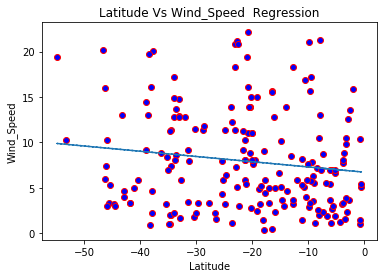

In [23]:
(slope,intercept,_,_,_)=linregress(x=Southern_df["lat"],y=Southern_df["Wind_Speed"])
latitude =Southern_df .iloc[:,6]
WindSpeed=Southern_df.iloc[:,9]
fit=slope * latitude +intercept
plt.scatter(x=Southern_df["lat"],y=Southern_df["Wind_Speed"],edgecolors="r",facecolor="b")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Latitude Vs Wind_Speed  Regression")
plt.plot(latitude,fit,"--")
print("Southern Hemisphere:Regression between Latitude and Wind Speed\n ")
print("Minimal relationship between Latitude and Wind Speed")
